<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/CRANK_NICOLSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***METODO IMPLICITO DE CRANCK-NICOLSON***\
**ERICK VALDEZ SALLAGOS**\
RESOLVER\
$U_t=U_{xx}$\
Con las condiciones\
$U(0, t)=0$\
$U(1, t)=0$\
$U(x, 0)=1-4(x-1/2)^2$




Importar librerias

In [66]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # Corregido: 'matplottilb' a 'matplotlib', y es buena práctica importar 'cm' directamente de 'matplotlib'
from tabulate import tabulate

Definamos la condicion inicial

In [67]:
def f(x):
  return 1 - 4*(x-0.5)**2

Grafica de la condicion inicial

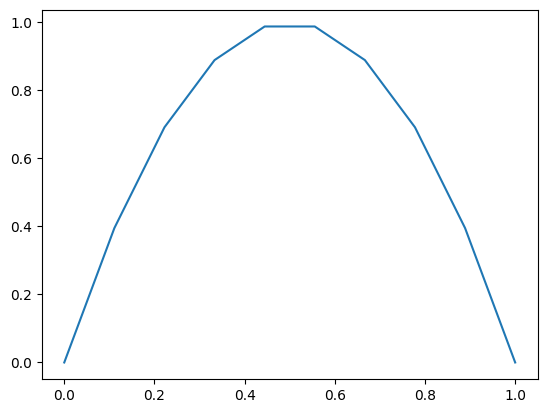

In [68]:
x=np.linspace(0,1,10)
plt.plot(x,f(x))

Funcion para la matriz tridiagonal

In [69]:
def tridiagonal(n, a, b):
  return sp.Matrix([
      [a if i ==j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)
      ])

Parametro r y matrices A y B

In [70]:
r=1

In [71]:
A = tridiagonal(9, 2 + 2*r, -r)
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [72]:
B = tridiagonal(9, 2 - 2*r, +r)
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Vector de condiciones iniciales discretas

In [73]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

Funcion Cranck-Nicolson

In [74]:
def crank_nicolson(A, B, b, j):
  b_1 = B*b  #mismo paso inicial de tu función
  S = []      #aqui guardaremos cada solución

  for i in range(j):
    sol = A.LUsolve(b_1) #u^{n+1}
    S.append(sol.T)
    b_1 = B*sol #preparar siguiente paso
  return sp.Matrix(S)

   #convertir lista de vectores sympy a una matrix sympy

Calculo de la solucion en el tiempo

In [75]:
j = 50 #Numero de pasos en el tiempo
U=crank_nicolson(A, B, b, j)

Tabla con los primeros resultados

In [76]:
data = [list(U.row(i)) for i in range(5)]
print(tabulate(data, tablefmt="grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

Conversion a numpy

In [77]:
U_np = np.array(U.tolist(), dtype=float)

Preparacion de malla espacal-temporal

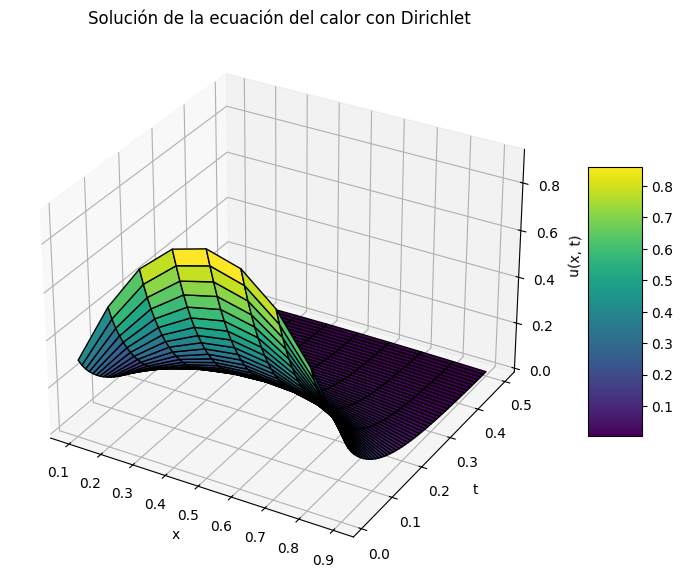

In [78]:
# Assuming U_np has already been computed with the correct dimensions (time_steps, spatial_points)
# Get the dimensions from U_np
num_time_steps = U_np.shape[0]
num_spatial_points = U_np.shape[1]

# Define h and dt based on problem context
h = 0.1 # From the problem description in the comment
dt = r * h**2 # r is defined as 1 in an earlier cell, so dt = 1 * (0.1)^2 = 0.01

# Define the spatial coordinates (x)
# The problem defines x_int = np.linspace(h, 1-h, n), where n=9 and h=0.1
x_coords = np.linspace(h, 1-h, num_spatial_points)

# Define the temporal coordinates (t)
# The time steps go from dt to num_time_steps * dt
t_coords = np.linspace(dt, num_time_steps * dt, num_time_steps)

# Create the meshgrid for plotting
X, Y = np.meshgrid(x_coords, t_coords)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('t') # Y now represents time
ax.set_zlabel('u(x, t)') # Updated label
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Calculo para un tiempo determinado

In [79]:
h  = 0.1
dt = 0.01
j  = 10          # para t = 5

U = crank_nicolson(A, B, b, j)   # U tiene tamaño (j, n)

# n = número de nodos interiores
n = U.shape[1]

# tiempo que estamos graficando
t_plot = j*dt   # debe dar 0.10

# vector numérico en ese tiempo: fila j-1 (porque Python empieza en 0)
u_num = np.array(U[j-1, :], dtype=float).ravel()

# nodos interiores en x
x_int = np.linspace(h, 1-h, n)

# si sólo quieres comparar con la tabla (que llega a x = 0.5)
mask = x_int <= 0.5
x_num_cmp = x_int[mask]
u_num_cmp = u_num[mask]
x_num_cmp_con0 = np.concatenate(([0.0], x_num_cmp))
u_num_cmp_con0 = np.concatenate(([0.0], u_num_cmp))

Comparacion con datos de tabla

In [80]:
# puntos de la tabla
x_tabla = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

# valores u(x,0.10) de la tabla
u_tabla_t010 = np.array([0, 0.1189, 0.2261, 0.3112, 0.3658, 0.3847])

In [81]:
x_num_cmp_con0 = np.concatenate(([0.0], x_num_cmp))
u_num_cmp_con0 = np.concatenate(([0.0], u_num_cmp))

Grafica comparativa

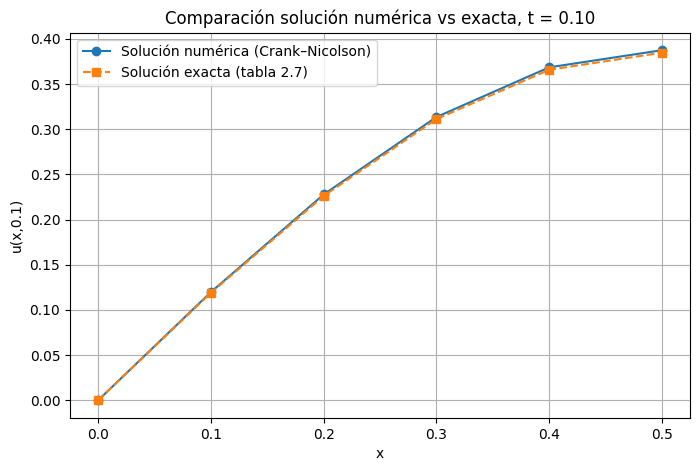

In [82]:
plt.figure(figsize=(8,5))

# numérica Crank–Nicolson
plt.plot(x_num_cmp_con0, u_num_cmp_con0, 'o-', label='Solución numérica (Crank–Nicolson)')

# “exacta” de la tabla
plt.plot(x_tabla, u_tabla_t010, 's--', label='Solución exacta (tabla 2.7)')

plt.xlabel('x')
plt.ylabel(f'u(x,{t_plot})')
plt.title(f'Comparación solución numérica vs exacta, t = {t_plot:.2f}')
plt.grid(True)
plt.legend()
plt.show()
